In [65]:
from __future__ import print_function
from __future__ import division
import datetime as dt
import hdbscan
import logging
import matplotlib.pyplot as plt
from IPython.display import HTML
from fleet_clustering import bq
from fleet_clustering import filters
from fleet_clustering import distances
from fleet_clustering import animation


%matplotlib inline

In [33]:
ais_by_date = bq.load_ais_by_date('squid_jigger', dt.date(2017, 1, 1), dt.date(2017, 12, 31))

In [35]:
pruned_by_date = {k : filters.remove_chinese_coast(v) for (k, v) in ais_by_date.items()}

In [75]:
valid_ssvid = sorted(filters.find_valid_ssvid(pruned_by_date))
C = distances.create_composite_lonlat_array(pruned_by_date, valid_ssvid)

In [80]:
dists = distances.compute_distances(C, clip=1000)
clusterer = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=10)
clusterer.fit(dists)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='precomputed', min_cluster_size=10, min_samples=None, p=None,
    prediction_data=False)

0 [u'412', u'416'] [(u'412', 639), (u'416', 98), (u'701', 67), (u'440', 29), (u'431', 23), (u'441', 18), (u'200', 14), (u'577', 3), (u'201', 3), (u'413', 2), (u'432', 2), (u'741', 1), (u'212', 1), (u'600', 1), (u'312', 1), (u'576', 1), (u'273', 1), (u'288', 1), (u'527', 1), (u'666', 1), (u'777', 1), (u'585', 1), (u'720', 1), (u'700', 1), (u'567', 1), (u'224', 1), (u'414', 1), (u'518', 1), (u'299', 1)]
1 [u'412'] [(u'412', 40), (u'416', 2), (u'413', 2), (u'440', 1), (u'700', 1), (u'701', 1), (u'553', 1), (u'414', 1), (u'525', 1)]


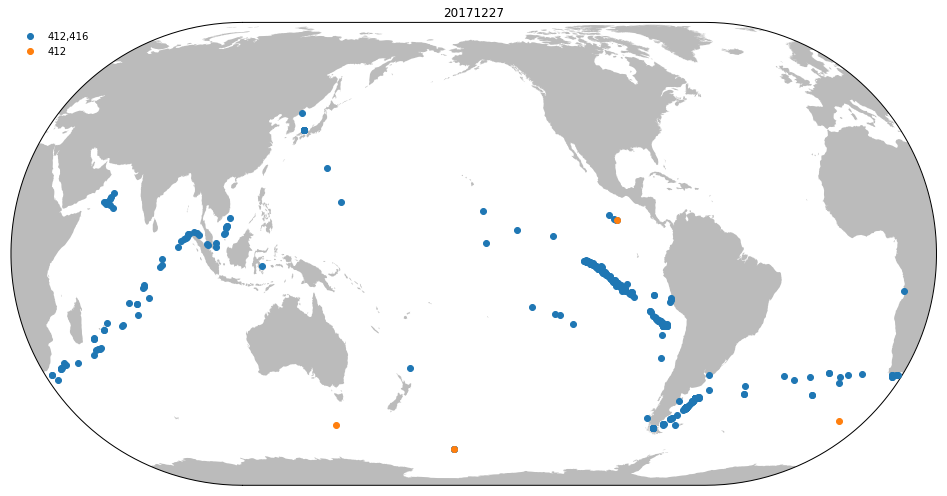

In [83]:
imp.reload(animation)
anim = animation.make_anim(valid_ssvid, clusterer.labels_, pruned_by_date, interval=5)
HTML(anim.to_html5_video())

0 [u'412', u'416'] [(u'412', 639), (u'416', 98), (u'701', 67), (u'440', 29), (u'431', 23), (u'441', 18), (u'200', 14), (u'577', 3), (u'201', 3), (u'413', 2), (u'432', 2), (u'741', 1), (u'212', 1), (u'600', 1), (u'312', 1), (u'576', 1), (u'273', 1), (u'288', 1), (u'527', 1), (u'666', 1), (u'777', 1), (u'585', 1), (u'720', 1), (u'700', 1), (u'567', 1), (u'224', 1), (u'414', 1), (u'518', 1), (u'299', 1)]
1 [u'412'] [(u'412', 40), (u'416', 2), (u'413', 2), (u'440', 1), (u'700', 1), (u'701', 1), (u'553', 1), (u'414', 1), (u'525', 1)]


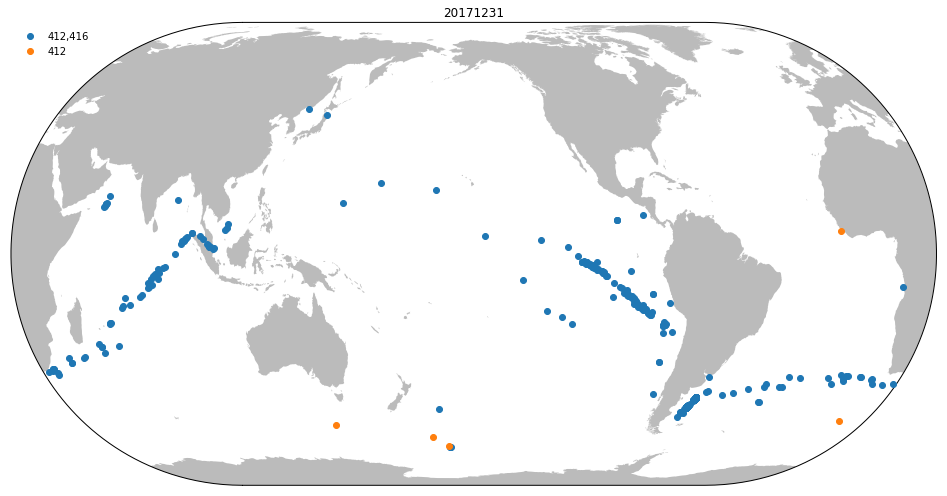

In [84]:
anim = animation.make_anim(valid_ssvid, clusterer.labels_, pruned_by_date, interval=1)
Writer = mpl_animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=1800)
anim.save('fleet_squid.mp4', writer=writer)